In [2]:
print('hello, world')

hello, world


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Social_Network_Ads.csv')

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df = df.iloc[:, 2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=0)
X_train, X_test, y_train, y_test

(     Age  EstimatedSalary
 92    26            15000
 223   60           102000
 234   38           112000
 232   40           107000
 377   42            53000
 ..   ...              ...
 323   48            30000
 192   29            43000
 117   36            52000
 47    27            54000
 172   26           118000
 
 [280 rows x 2 columns],
      Age  EstimatedSalary
 132   30            87000
 309   38            50000
 341   35            75000
 196   30            79000
 246   35            50000
 ..   ...              ...
 216   49            65000
 259   45           131000
 49    31            89000
 238   46            82000
 343   47            51000
 
 [120 rows x 2 columns],
 92     0
 223    1
 234    0
 232    1
 377    0
       ..
 323    1
 192    0
 117    0
 47     0
 172    0
 Name: Purchased, Length: 280, dtype: int64,
 132    0
 309    0
 341    0
 196    0
 246    0
       ..
 216    0
 259    1
 49     0
 238    0
 343    1
 Name: Purchased, Length: 120, dt

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

# fit the scaler to train set, it will learn the parameters, transform both the train and test sets
scaler.fit(X_train)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [11]:
scaler.mean_

array([3.71666667e+01, 6.95916667e+04])

In [12]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [13]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [14]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


## Effect of Scaling

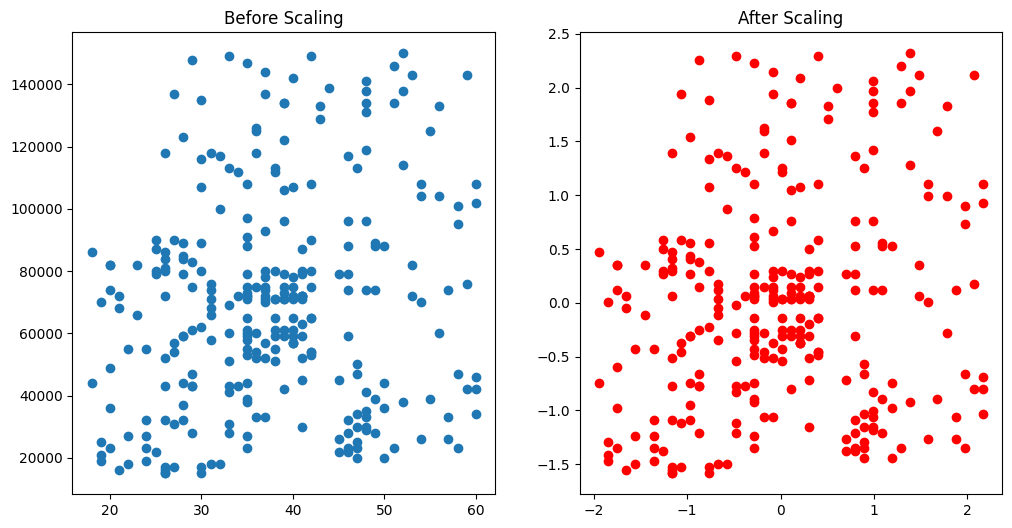

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title('After Scaling')

plt.show()

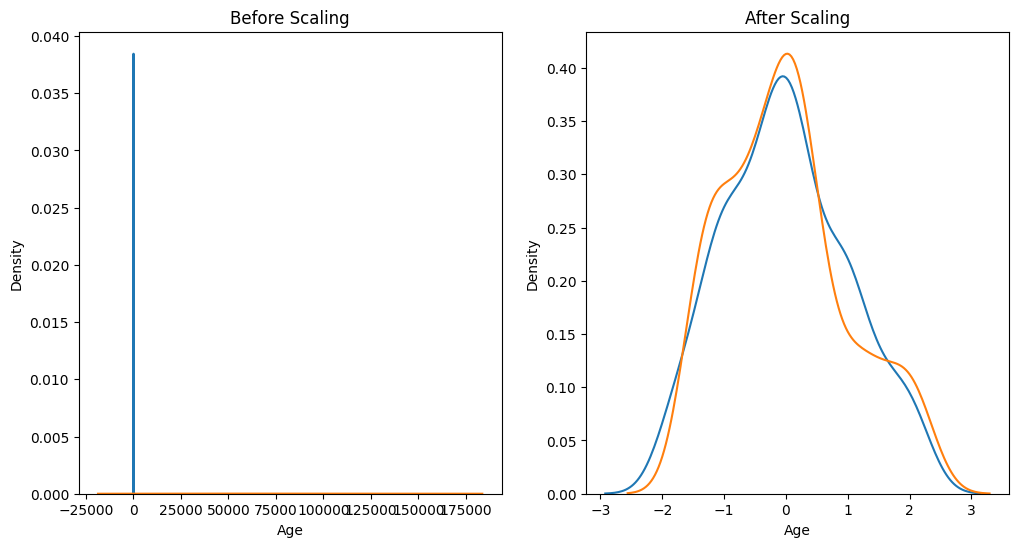

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)

plt.show()

## Comaparison of Distribution

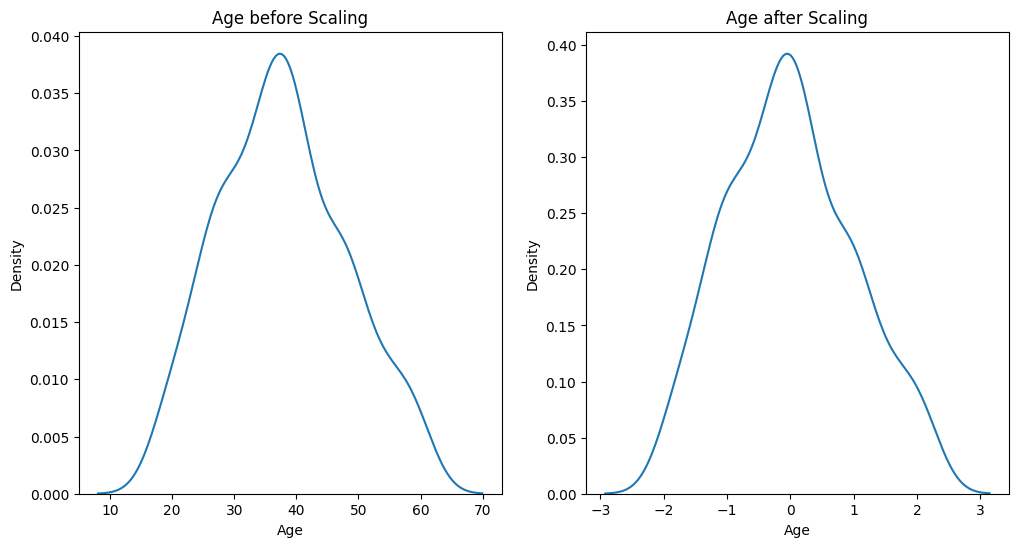

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

ax1.set_title('Age before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

ax2.set_title('Age after Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)

plt.show()

<Axes: title={'center': 'Salary after Scaling'}, xlabel='EstimatedSalary', ylabel='Density'>

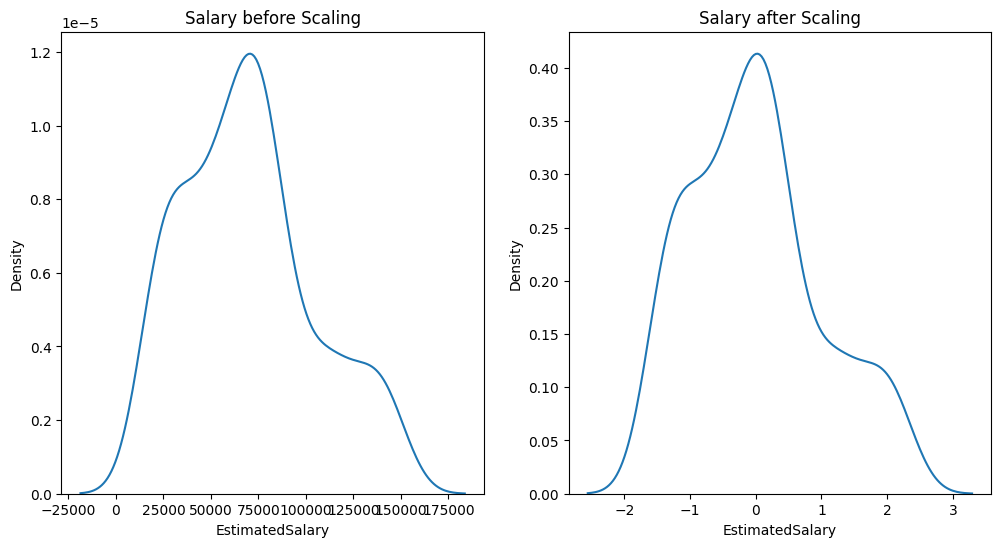

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

ax1.set_title('Salary before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

ax2.set_title('Salary after Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)

# Why is Scaling important?

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [35]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [36]:
ypred = lr.predict(X_test)
ypred_scaled = lr_scaled.predict(X_test_scaled)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
print('Actual', accuracy_score(y_test, ypred))
print('Scaled', accuracy_score(y_test, ypred_scaled))

Actual 0.875
Scaled 0.8916666666666667


In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [41]:
dt.fit(X_train, y_train)
dt_scaled.fit(X_train_scaled, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [44]:
ypred = dt.predict(X_test)
ypred_scaled = dt_scaled.predict(X_test_scaled)

In [45]:
print('Actual', accuracy_score(y_test, ypred))
print('Scaled', accuracy_score(y_test, ypred_scaled))

Actual 0.8666666666666667
Scaled 0.8666666666666667


In [46]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000
